In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import timeit

### References

Authors who are consistent (10 year career span and atleast 10 papers published) are derived from the notebook 'cumulative-adv-author-statistics-for-analysis'

'authors-scientific-start-end-year.csv' is one of the byproduct of that. But it contains a lot of sparse values, In the sense it contains 
a lot of authors who dropped out early in their career

'authors-scientific-atleat-10-year-10-papers.csv' - contains consistent authors 

Code snippet from 'cumulative-adv-cohort-analysis-for-1970-2000-publications' is heavily used which uses 'cumulative-adv-cohort-analysis-for-1970-authors' notebook heavily

In [2]:
start_time = timeit.default_timer()
print(start_time)

1.5550024584588868e-06


In [3]:
authorStartEndCareerData = pd.read_csv('data/authors-scientific-start-end-year-publish-count.csv')
#authorStartEndCareerData = pd.read_csv('data/authors-scientific-atleast-10-year-10-papers.csv')
#authorStartEndCareerData = pd.read_csv('data/authors-scientific-atleast-20-year-20-papers.csv')

authorStartEndCareerData.head()

,author,start_year,end_year,pub_count
0,'maseka lesaoana,2001,2015,2
1,(max) zong-ming cheng,2009,2011,2
2,(zhou) bryan bai,2011,2012,2
3,a lun,2010,2010,1
4,a min tjoa,1979,2015,193


In [4]:
groupByStartYearScientificCareerData = authorStartEndCareerData[['author','start_year']].groupby(['start_year'])
groupByStartYearScientificCareerData.groups

{1970: Int64Index([     55,     148,    1164,    1490,    2245,    2250,    2420,
                2525,    3040,    3250,
             ...
             1637528, 1654954, 1656355, 1657684, 1668510, 1668929, 1685326,
             1703339, 1704543, 1706204],
            dtype='int64', length=1835),
 1971: Int64Index([    218,     441,    1482,    1663,    2556,    2566,    2891,
                3025,    3280,    3528,
             ...
             1685941, 1685958, 1686039, 1686187, 1687109, 1687576, 1703548,
             1703680, 1706128, 1706976],
            dtype='int64', length=2092),
 1972: Int64Index([    288,     333,     337,    1398,    1542,    1884,    2213,
                2399,    2405,    2597,
             ...
             1675205, 1675437, 1679767, 1681701, 1683153, 1683204, 1683442,
             1686076, 1686169, 1701471],
            dtype='int64', length=1982),
 1973: Int64Index([    176,     439,    1184,    1596,    1665,    2120,    2130,
                2232,    25

In [5]:
authorCitationsData = pd.read_csv('data/authors_cite_2016_asiansAsNone.txt')

# we have to create a smaller subset - for now - ignore the comments below
# To speed up the implementation, if required consider a small dataset
# Look at 'shorten-dblp-data-for-faster-access' notebook to creat a smaller dataset
#authorPublicationsData = pd.read_csv('data/author_publications_1970_2000_asiansAsNone.csv')
authorCitationsData.head()

#id1 represents the author who cited
#id2 is the author who has been cited by id1

,id1,id2,year
0,stefano rizzi,qiong fang,2006
1,stefano rizzi,jianlin feng,2006
2,stefano rizzi,hulin ding,2006
3,alberto abelló,qiong fang,2006
4,alberto abelló,jianlin feng,2006


In [6]:
#get the year list - 1970 to 2016
years = np.arange(1970,2017)
years

array([1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
       1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
       1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
       2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015, 2016])

In [7]:
#Group by both year and author(id2 here) - multi index and hierarchial indexing
groupByAuthorYear = authorCitationsData.groupby(['year','id2'])
# count of no. of publications for each and every author for every year
groupByAuthorYearData = groupByAuthorYear.count() 

# id1 - represents the no. of authors who cited

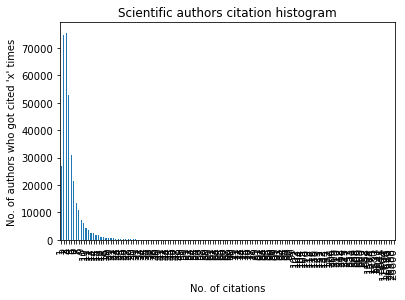

count      135.000000
mean      2566.051852
std      10852.940838
min          1.000000
25%          2.000000
50%          7.000000
75%        100.000000
max      75503.000000
Name: id1, dtype: float64

In [8]:
scientificYearStartHistogram = groupByAuthorYearData['id1'].value_counts(sort=False)
ax = scientificYearStartHistogram.sort_index().plot(kind='bar', title='Scientific authors citation histogram')
ax.set_xlabel("No. of citations")
ax.set_ylabel("No. of authors who got cited 'x' times")
plt.show()

scientificYearStartHistogram.describe()

In [9]:
#the following snippet is taken from the github project and the license is creative commons
#https://github.com/oliviaguest/gini

def gini(array):
    """Calculate the Gini coefficient of a numpy array."""
    # based on bottom eq:
    # http://www.statsdirect.com/help/generatedimages/equations/equation154.svg
    # from:
    # http://www.statsdirect.com/help/default.htm#nonparametric_methods/gini.htm
    # All values are treated equally, arrays must be 1d:
    array = array.flatten()
    if np.min(array) < 0:
        # Values cannot be negative:
        array -= np.min(array)
    # Values cannot be 0:
    array += 0.0000001
    # Values must be sorted:
    array = np.sort(array)
    # Index per array element:
    index = np.arange(1,array.shape[0]+1)
    # Number of array elements:
    n = array.shape[0]
    # Gini coefficient:
    return ((np.sum((2 * index - n  - 1) * array)) / (n * np.sum(array)))

In [10]:
gini_evolution = pd.DataFrame(index=years)
non_publishers_track = pd.DataFrame(index=years)
for year in groupByStartYearScientificCareerData.indices:
    authors_for_comparison = groupByStartYearScientificCareerData.get_group(year)
    gini_over_years = pd.Series(data=0, index=years)
    non_publishers_over_years = pd.Series(data=0, index=years)
    for i in range(year, max(years)+1):
        # get all the authors data for each year and filter based on the authors that we are interested in
        if i in groupByAuthorYearData.index:
            temp = groupByAuthorYearData.loc[i] 
            check = temp.index.isin(authors_for_comparison['author'])
            if check.sum() > 0: 
                temp = temp.loc[authors_for_comparison['author']]
                noOfAuthorsWhoPublishedNothing = temp.isnull().sum()['id1'] / temp.size

                # fill 0 for authors who has not published and change the data to float for gini function (relevant to implementaion) to work
                temp.fillna(value=0, inplace=True)
                #temp = temp['pub_id'].values
                #groupByAuthorYearData.loc[i]['pub_id'].as_matrix()
                temp = temp.astype(float)
                gini_over_years.loc[i] = gini(temp['id1'].values)
                non_publishers_over_years.loc[i] = noOfAuthorsWhoPublishedNothing
            else :
                gini_over_years.loc[i] = 0
                non_publishers_over_years.loc[i] = 0
        #break
    #break
        #else:
        #    print(year,i)
         
    gini_evolution[year] = gini_over_years
    non_publishers_track[year] = non_publishers_over_years
    #print(year)
    #print(gini_evolution[year])
        

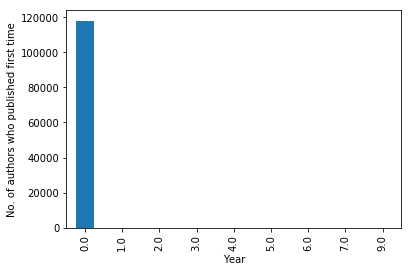

count         9.000000
mean      13111.111111
std       39326.958360
min           1.000000
25%           1.000000
50%           2.000000
75%           4.000000
max      117983.000000
Name: id1, dtype: float64

In [11]:
#authors_for_comparison.describe()

scientificYearStartHistogram = temp['id1'].value_counts(sort=False)
ax = scientificYearStartHistogram.sort_index().plot(kind='bar')
ax.set_xlabel("Year")
ax.set_ylabel("No. of authors who published first time")
plt.show()

scientificYearStartHistogram.describe()

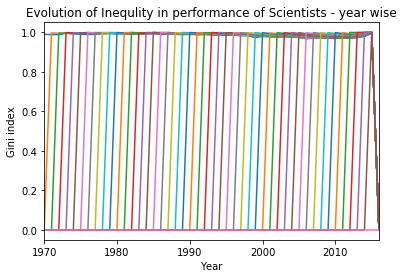

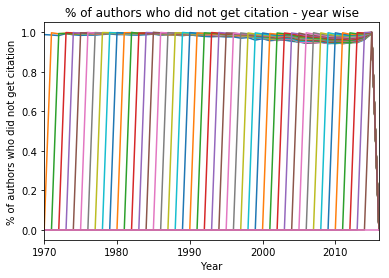

In [12]:
ax = gini_evolution.plot(title='Evolution of Inequlity in performance of Scientists - year wise', 
                         legend=False)
ax.set_xlabel("Year")
ax.set_ylabel("Gini index")
plt.show()


ax = non_publishers_track.plot(title='% of authors who did not get citation - year wise',
                              legend=False)
ax.set_xlabel("Year")
ax.set_ylabel("% of authors who did not get citation")
plt.show()

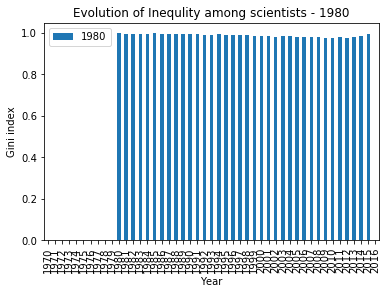

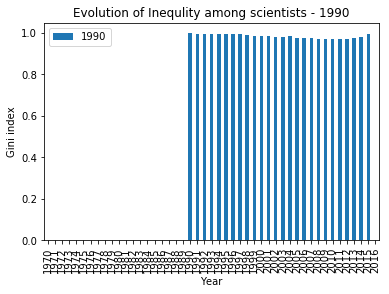

In [13]:
ax = gini_evolution[[1980]].plot(kind='bar', title='Evolution of Inequlity among scientists - 1980')
#ax.plot(non_publishers_track[1990])
ax.set_xlabel("Year")
ax.set_ylabel("Gini index")
plt.show()

ax = gini_evolution[[1990]].plot(kind='bar', title='Evolution of Inequlity among scientists - 1990')
#ax.plot(non_publishers_track[1990])
ax.set_xlabel("Year")
ax.set_ylabel("Gini index")
plt.show()

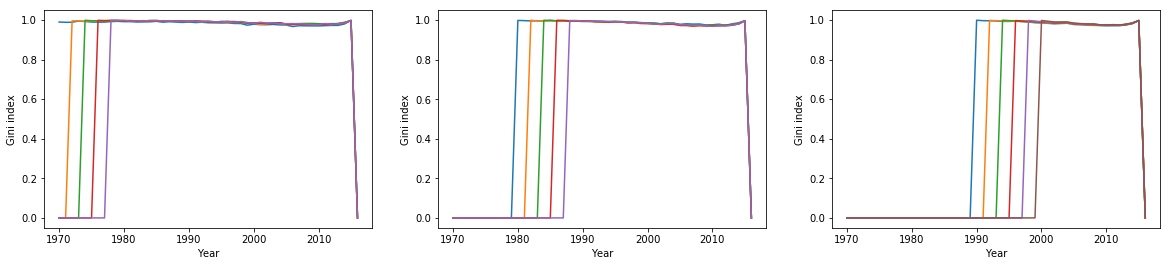

In [14]:
f1 = plt.figure(1,figsize=(20,4))
s1 = f1.add_subplot(131)
ax1 = s1.axes
ax1.set_xlabel("Year")
ax1.set_ylabel("Gini index")
s1.plot(gini_evolution[list(range(1970,1980,2))])
#ax1 = gini_evolution[list(range(1970,1980,2))].plot(title='Evolution of Inequlity among scientists - in 1970s')
#ax.plot(non_publishers_track[1990])

s2 = f1.add_subplot(132)
s2.plot(gini_evolution[list(range(1980,1990,2))])
ax2 = s2.axes
#ax2 = gini_evolution[list(range(1980,1990,2))].plot(title='Evolution of Inequlity among scientists - in 1980s')
#ax.plot(non_publishers_track[1990])
ax2.set_xlabel("Year")
ax2.set_ylabel("Gini index")


s3 = f1.add_subplot(133)
s3.plot(gini_evolution[list(range(1990,2002,2))])
ax3 = s3.axes
#ax2 = gini_evolution[list(range(1980,1990,2))].plot(title='Evolution of Inequlity among scientists - in 1990s')
#ax.plot(non_publishers_track[1990])
ax3.set_xlabel("Year")
ax3.set_ylabel("Gini index")

plt.show()

In [15]:
end_time = timeit.default_timer()
print(end_time)
print('Time taken - ',end_time-start_time)

32.98054660824419
Time taken -  32.980545053241734
